<a href="https://colab.research.google.com/github/RandDahmash/Mining-project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Load the Dataset
df = pd.read_csv("Cleaned_dataset.csv")
df.head()



Gender  Age  Education Level  Institution Type  IT Student  Location  \
0       0  0.6                2                 1           0         1   
1       1  0.6                2                 1           0         1   
2       1  0.4                0                 0           0         1   
3       1  0.2                1                 1           0         1   
4       1  0.4                1                 1           0         1   

   Load-shedding  Financial Condition  Internet Type  Network Type  \
0              1                    0              1             2   
1              0                    0              0             2   
2              1                    0              1             2   
3              1                    0              0             2   
4              1                    1              0             1   

   Class Duration  Self Lms  Device  Adaptivity Level  
0               1         0       2                 2  
1               0         1       1                 2  
2               0         0       1                 2  
3               0         0       1                 2  
4               0         0       1                 1

In [4]:
#Number of rows and columns is the preprossed dataset
df.shape

(256, 14)

In [5]:
#Split dataset in features and target variable
fn=df.keys().tolist()[:-1]
X = df[fn]#Features names
y = df["Adaptivity Level"]#target variable




## Classification






# **1**-Splitting dataset into 70% Training and 30% Testing

In [6]:

# Split dataset into 70% Training and 30% Testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (179, 13)
Testing set size: (77, 13)


## Gini index

In [7]:
#Build Decision Tree Model (Gini Index)

# Model using Gini Index
dt_gini = DecisionTreeClassifier()
dt_gini=dt_gini.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_gini = dt_gini.predict(X_test)


Accuracy: 0.45454545454545453
Confusion Matrix:
[[ 1  0  2]
 [ 4 19 11]
 [ 9 16 15]]


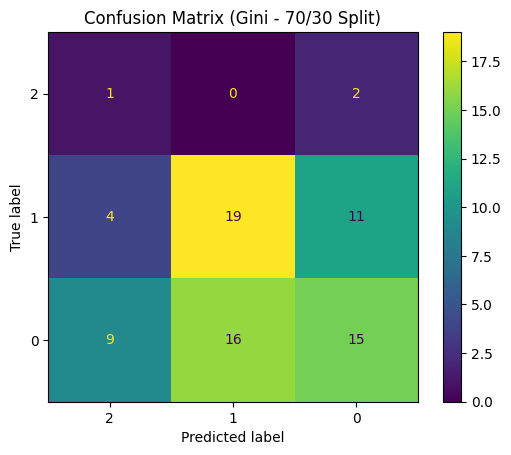

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_gini,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Gini - 70/30 Split)")
plt.show()

The diagonal elements (1, 18, 15) show correctly classified samples for each class (moderate,low, high).

The model performs best for the Low class (label = 1) with 18 correct predictions.

there is significant confusion between class 0 and class 2, where several “High” adaptivity students are predicted as “Moderate” (9 misclassified)






[Text(0.6971533764367817, 0.96875, 'Financial Condition <= 1.5\ngini = 0.597\nsamples = 179\nvalue = [21, 80, 78]\nclass = 1'),
 Text(0.46327227011494254, 0.90625, 'Institution Type <= 0.5\ngini = 0.555\nsamples = 164\nvalue = [10, 79, 75]\nclass = 1'),
 Text(0.5802128232758621, 0.9375, 'True  '),
 Text(0.25, 0.84375, 'Gender <= 0.5\ngini = 0.462\nsamples = 69\nvalue = [2, 46, 21]\nclass = 1'),
 Text(0.14367816091954022, 0.78125, 'Age <= 0.1\ngini = 0.517\nsamples = 46\nvalue = [2.0, 27.0, 17.0]\nclass = 1'),
 Text(0.13218390804597702, 0.71875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.15517241379310345, 0.71875, 'Age <= 0.5\ngini = 0.526\nsamples = 44\nvalue = [2.0, 25.0, 17.0]\nclass = 1'),
 Text(0.07471264367816093, 0.65625, 'Location <= 0.5\ngini = 0.545\nsamples = 20\nvalue = [1, 9, 10]\nclass = 0'),
 Text(0.034482758620689655, 0.59375, 'Education Level <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [0, 5, 2]\nclass = 1'),
 Text(0.022988505747126436, 0.53125, '

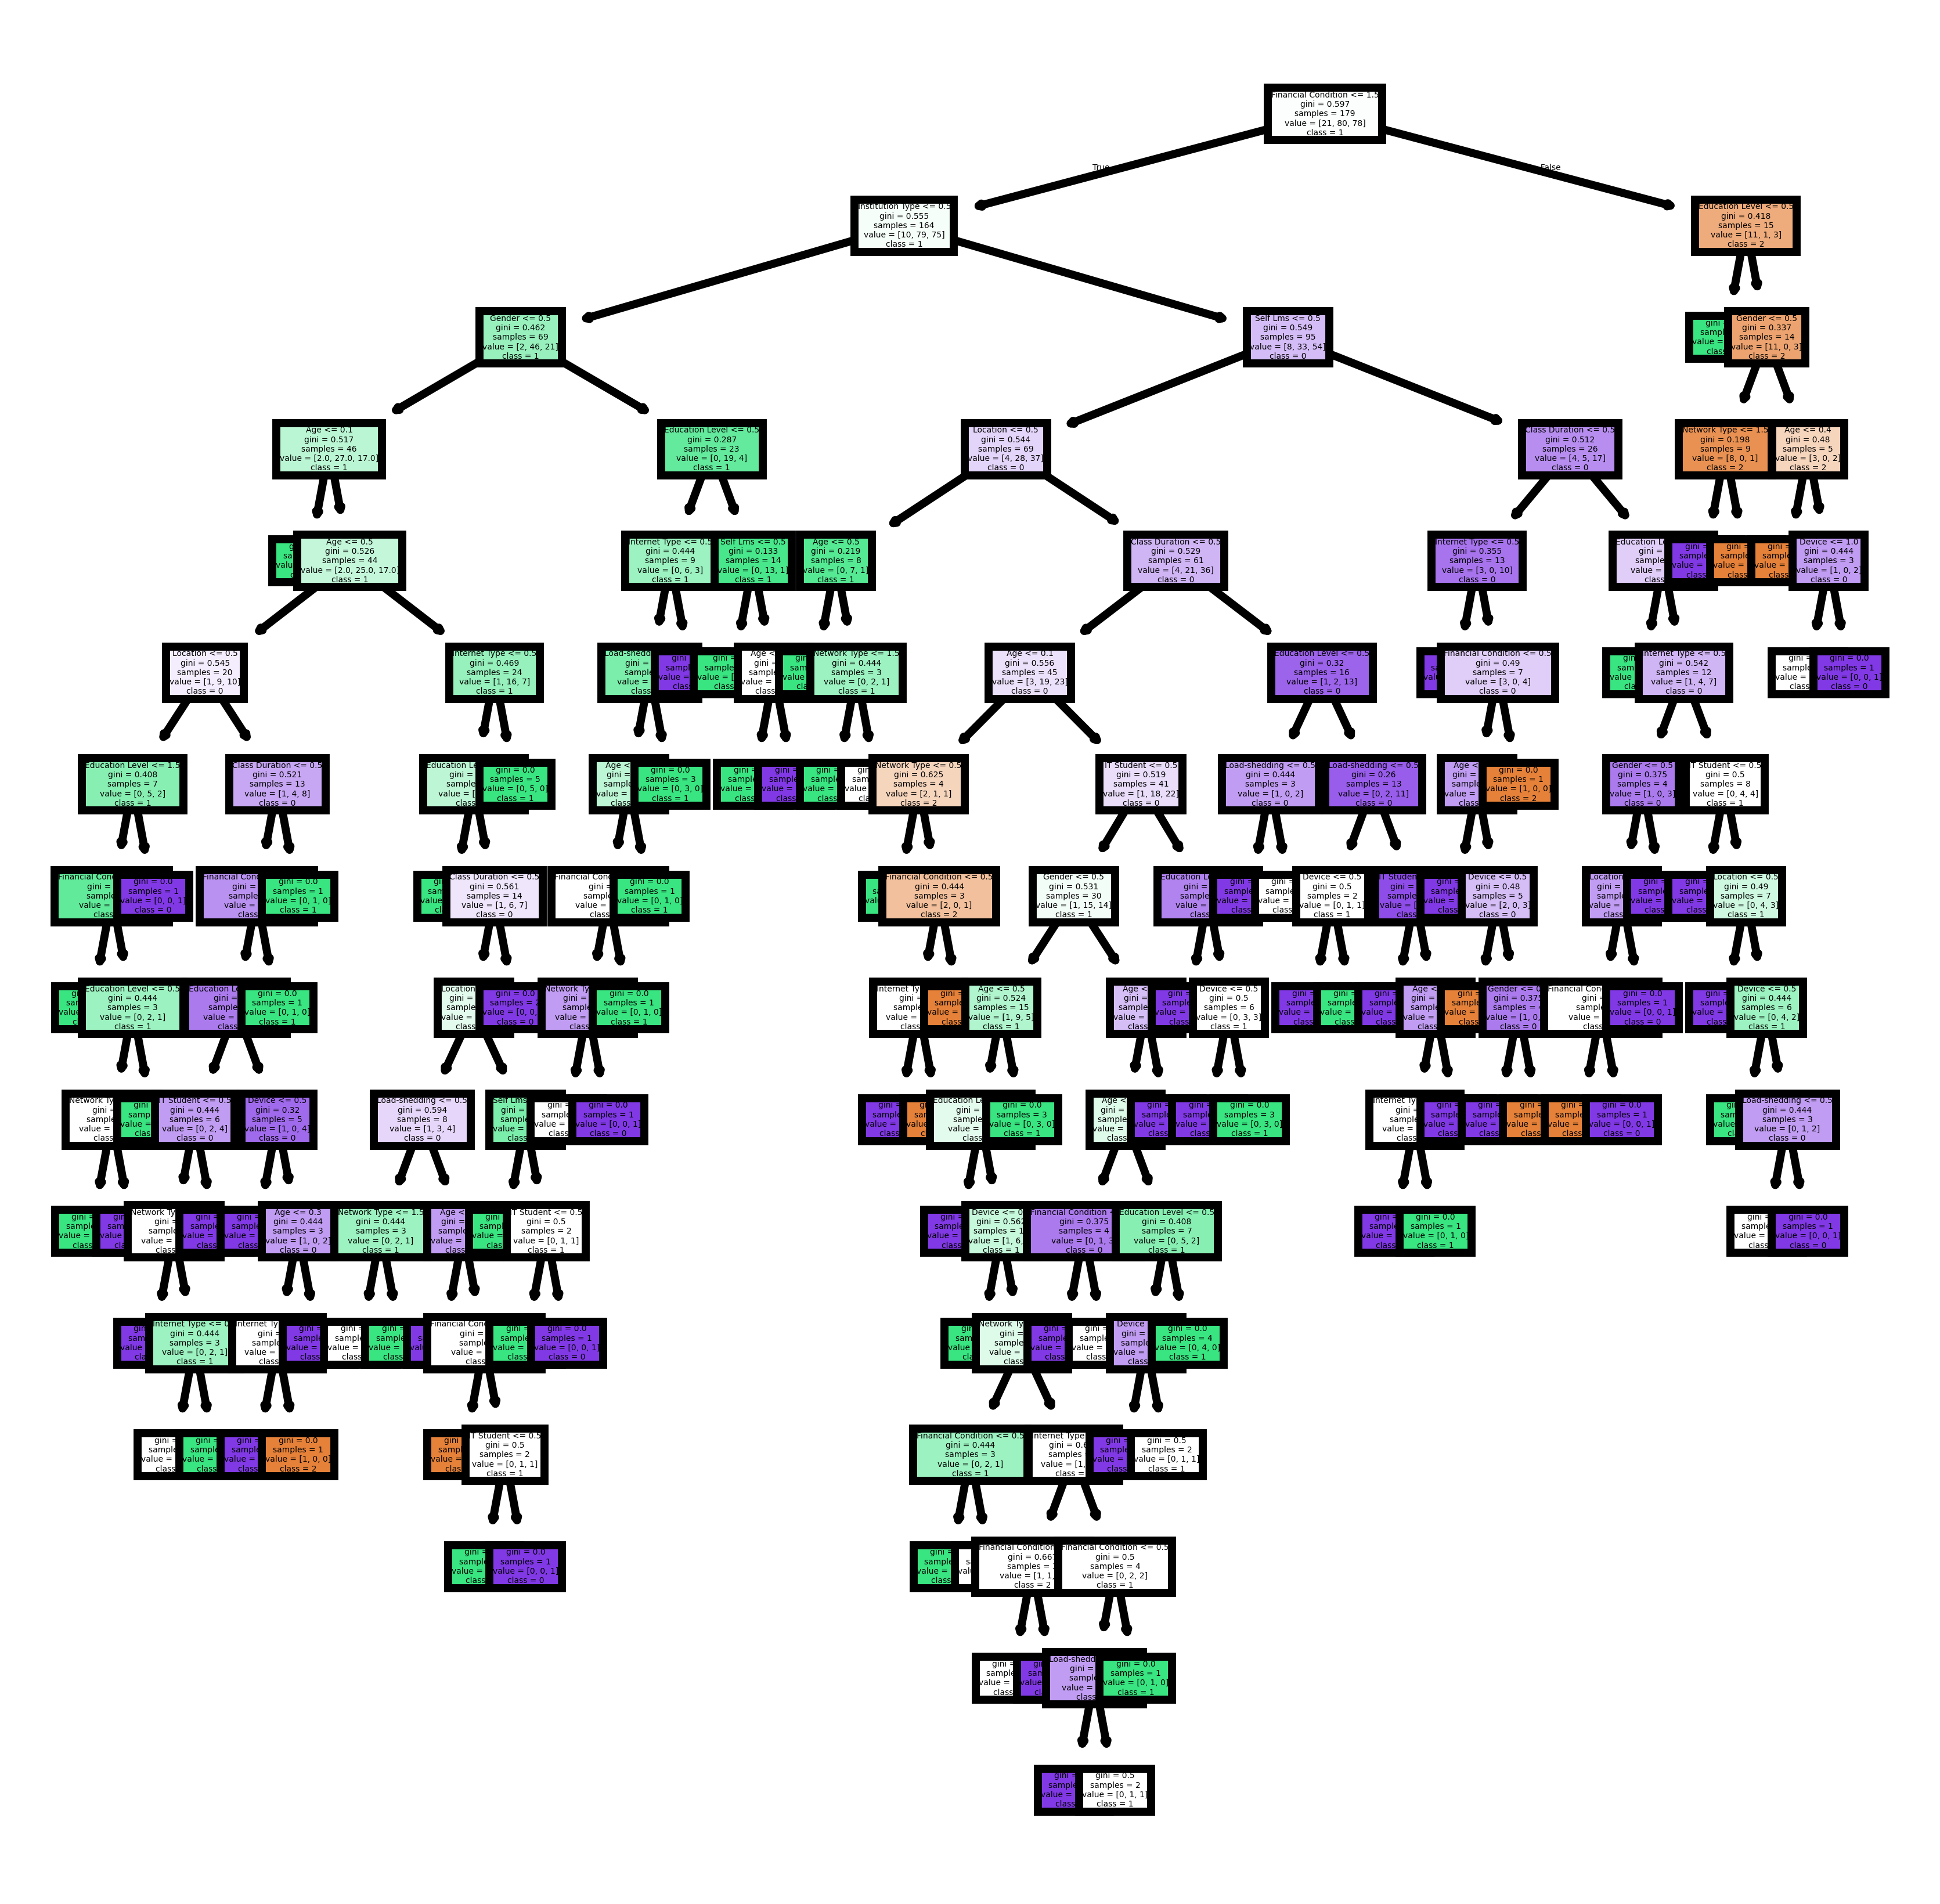

In [9]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

## Entropy


In [10]:
#Build Decision Tree Model (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_entropy = dt_entropy.predict(X_test)

Accuracy: 0.44155844155844154
Confusion Matrix:
[[ 1  0  2]
 [ 4 18 12]
 [10 15 15]]


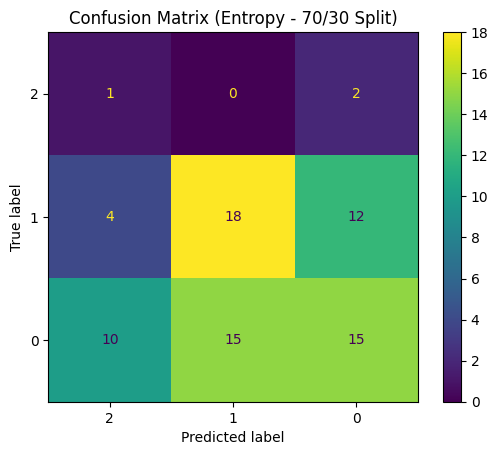

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_entropy,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Entropy - 70/30 Split)")
plt.show()

The diagonal elements (0, 19, 14) show correctly classified samples for each class (moderate,low, high).

The model performs best for the Low class (label = 1) with 19 correct predictions.

there is significant confusion between class 0 and class 2, where several “High” adaptivity students are predicted as “Moderate” (11 misclassified)
which is worst than using Gini index


[Text(0.6574296652421653, 0.9666666666666667, 'Financial Condition <= 1.5\nentropy = 1.404\nsamples = 179\nvalue = [21, 80, 78]\nclass = 1'),
 Text(0.42312143874643876, 0.9, 'Institution Type <= 0.5\nentropy = 1.27\nsamples = 164\nvalue = [10, 79, 75]\nclass = 1'),
 Text(0.540275551994302, 0.9333333333333333, 'True  '),
 Text(0.2720797720797721, 0.8333333333333334, 'Gender <= 0.5\nentropy = 1.06\nsamples = 69\nvalue = [2, 46, 21]\nclass = 1'),
 Text(0.1794871794871795, 0.7666666666666667, 'Age <= 0.7\nentropy = 1.179\nsamples = 46\nvalue = [2.0, 27.0, 17.0]\nclass = 1'),
 Text(0.09686609686609686, 0.7, 'Age <= 0.3\nentropy = 1.113\nsamples = 41\nvalue = [1, 24, 16]\nclass = 1'),
 Text(0.045584045584045586, 0.6333333333333333, 'Internet Type <= 0.5\nentropy = 1.459\nsamples = 6\nvalue = [1, 3, 2]\nclass = 1'),
 Text(0.022792022792022793, 0.5666666666666667, 'Location <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]\nclass = 1'),
 Text(0.011396011396011397, 0.5, 'entropy = 0.0\nsa

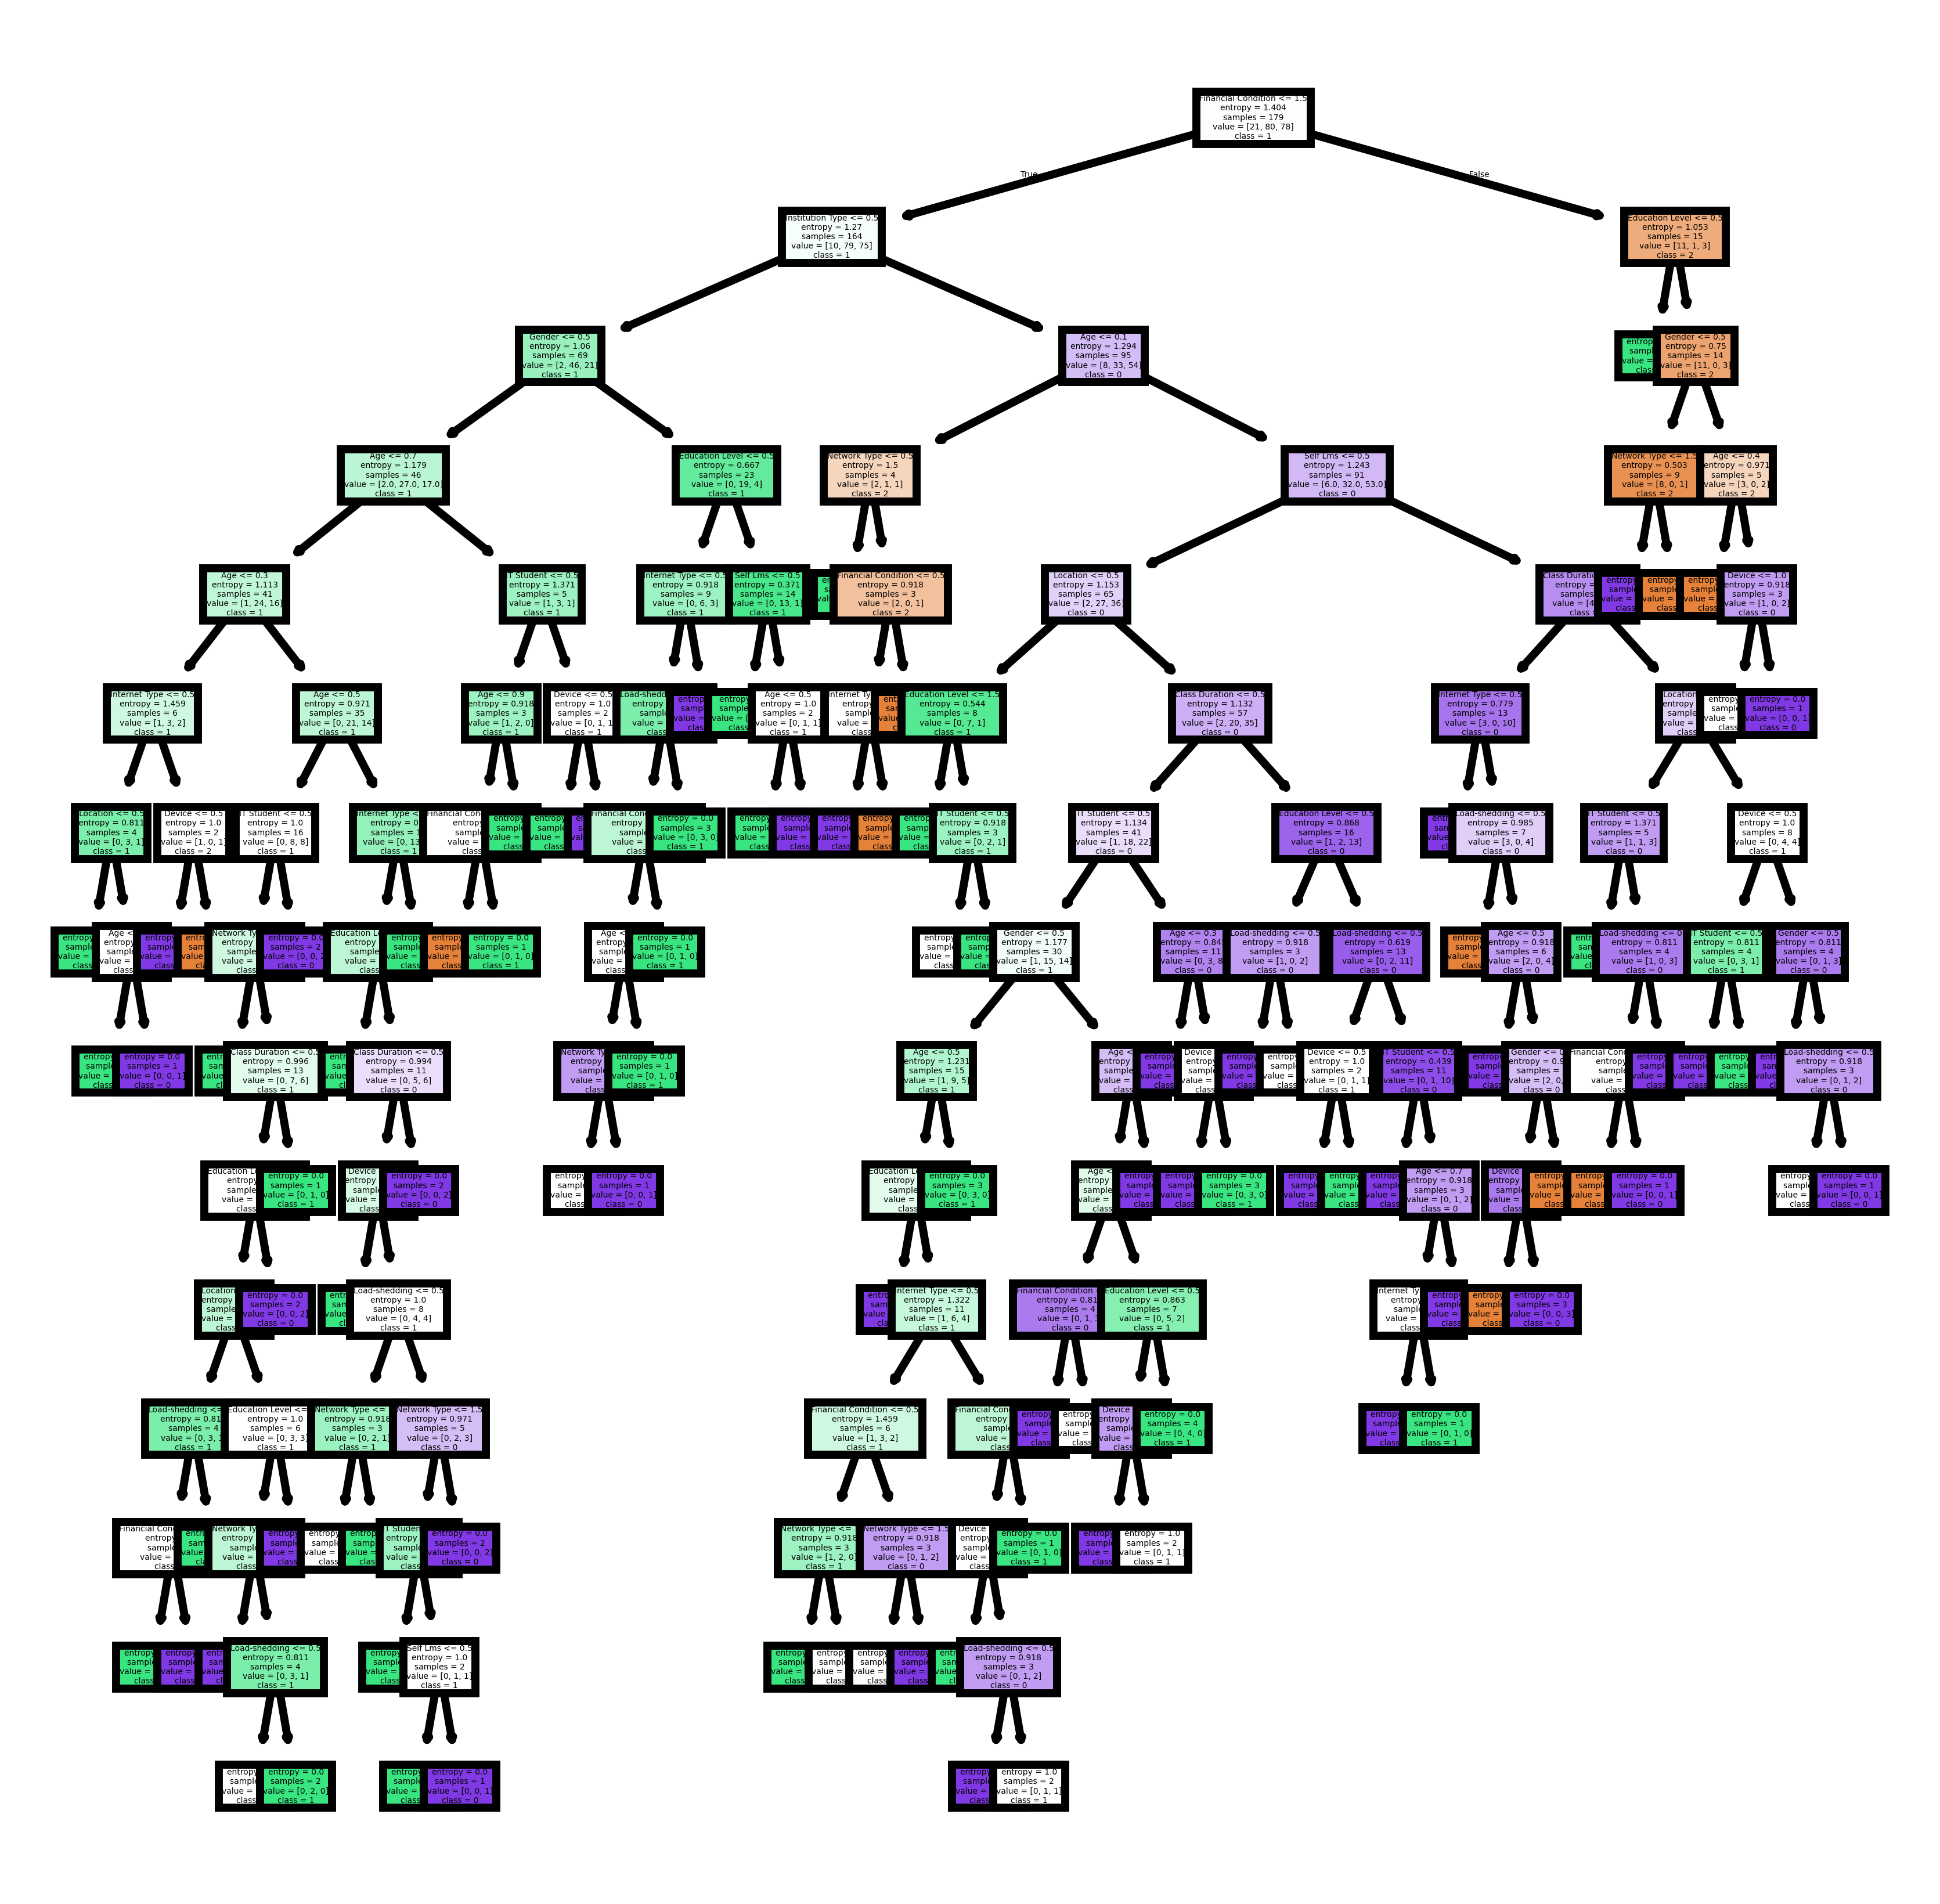

In [12]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_entropy,feature_names=fn,class_names=cn,filled=True)

## Comparsion :
Gini Index accuracy=	0.442 (44%)	higher accuracy

Information Gain (Entropy) accuracy=	0.429 (42%)	 lower accuracy

based on the accuracy , using Gini index is better when splitting using 70/30 size

# 2-Splitting dataset into 80% Training and 20% Testing

In [13]:
# Split dataset into 80% Training and 20% Testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (204, 13)
Testing set size: (52, 13)


## Gini index

In [14]:
#Build Decision Tree Model (Gini Index)
# Model using Gini Index
dt_gini = DecisionTreeClassifier()
dt_gini=dt_gini.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_gini = dt_gini.predict(X_test)

Accuracy: 0.36538461538461536
Confusion Matrix:
[[ 0  1  1]
 [ 2 13  5]
 [ 5 19  6]]


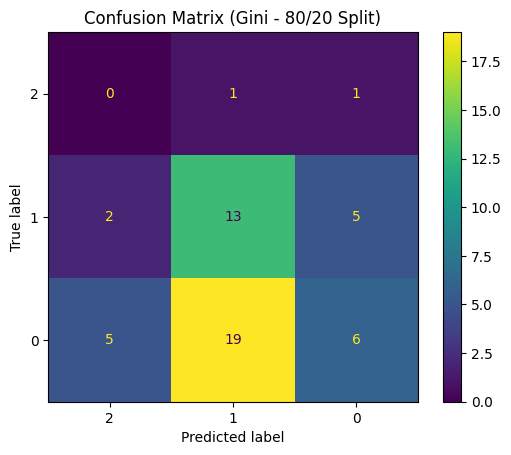

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_gini,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Gini - 80/20 Split)")
plt.show()

The model achieved an accuracy of 36.5%, which indicates weak classification performance.
Most predictions are concentrated in the “Low” (label 1) category (19 predicted from “High” and 12 correct), showing a bias toward this class.
The model struggles to correctly identify “High” (label 0) and “Moderate” (label 2) adaptivity levels — both have several misclassifications.

[Text(0.6437579314720813, 0.96875, 'Financial Condition <= 1.5\ngini = 0.59\nsamples = 204\nvalue = [22, 94, 88]\nclass = 1'),
 Text(0.38396256345177665, 0.90625, 'Institution Type <= 0.5\ngini = 0.552\nsamples = 187\nvalue = [11, 93, 83]\nclass = 1'),
 Text(0.5138602474619289, 0.9375, 'True  '),
 Text(0.22779187817258884, 0.84375, 'Gender <= 0.5\ngini = 0.457\nsamples = 79\nvalue = [2, 53, 24]\nclass = 1'),
 Text(0.12055837563451777, 0.78125, 'Age <= 0.1\ngini = 0.518\nsamples = 52\nvalue = [2.0, 30.0, 20.0]\nclass = 1'),
 Text(0.11040609137055837, 0.71875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = 1'),
 Text(0.13071065989847716, 0.71875, 'Age <= 0.5\ngini = 0.528\nsamples = 49\nvalue = [2.0, 27.0, 20.0]\nclass = 1'),
 Text(0.06598984771573604, 0.65625, 'Location <= 0.5\ngini = 0.538\nsamples = 24\nvalue = [1, 11, 12]\nclass = 0'),
 Text(0.030456852791878174, 0.59375, 'Education Level <= 1.5\ngini = 0.375\nsamples = 8\nvalue = [0, 6, 2]\nclass = 1'),
 Text(0.020304568527918

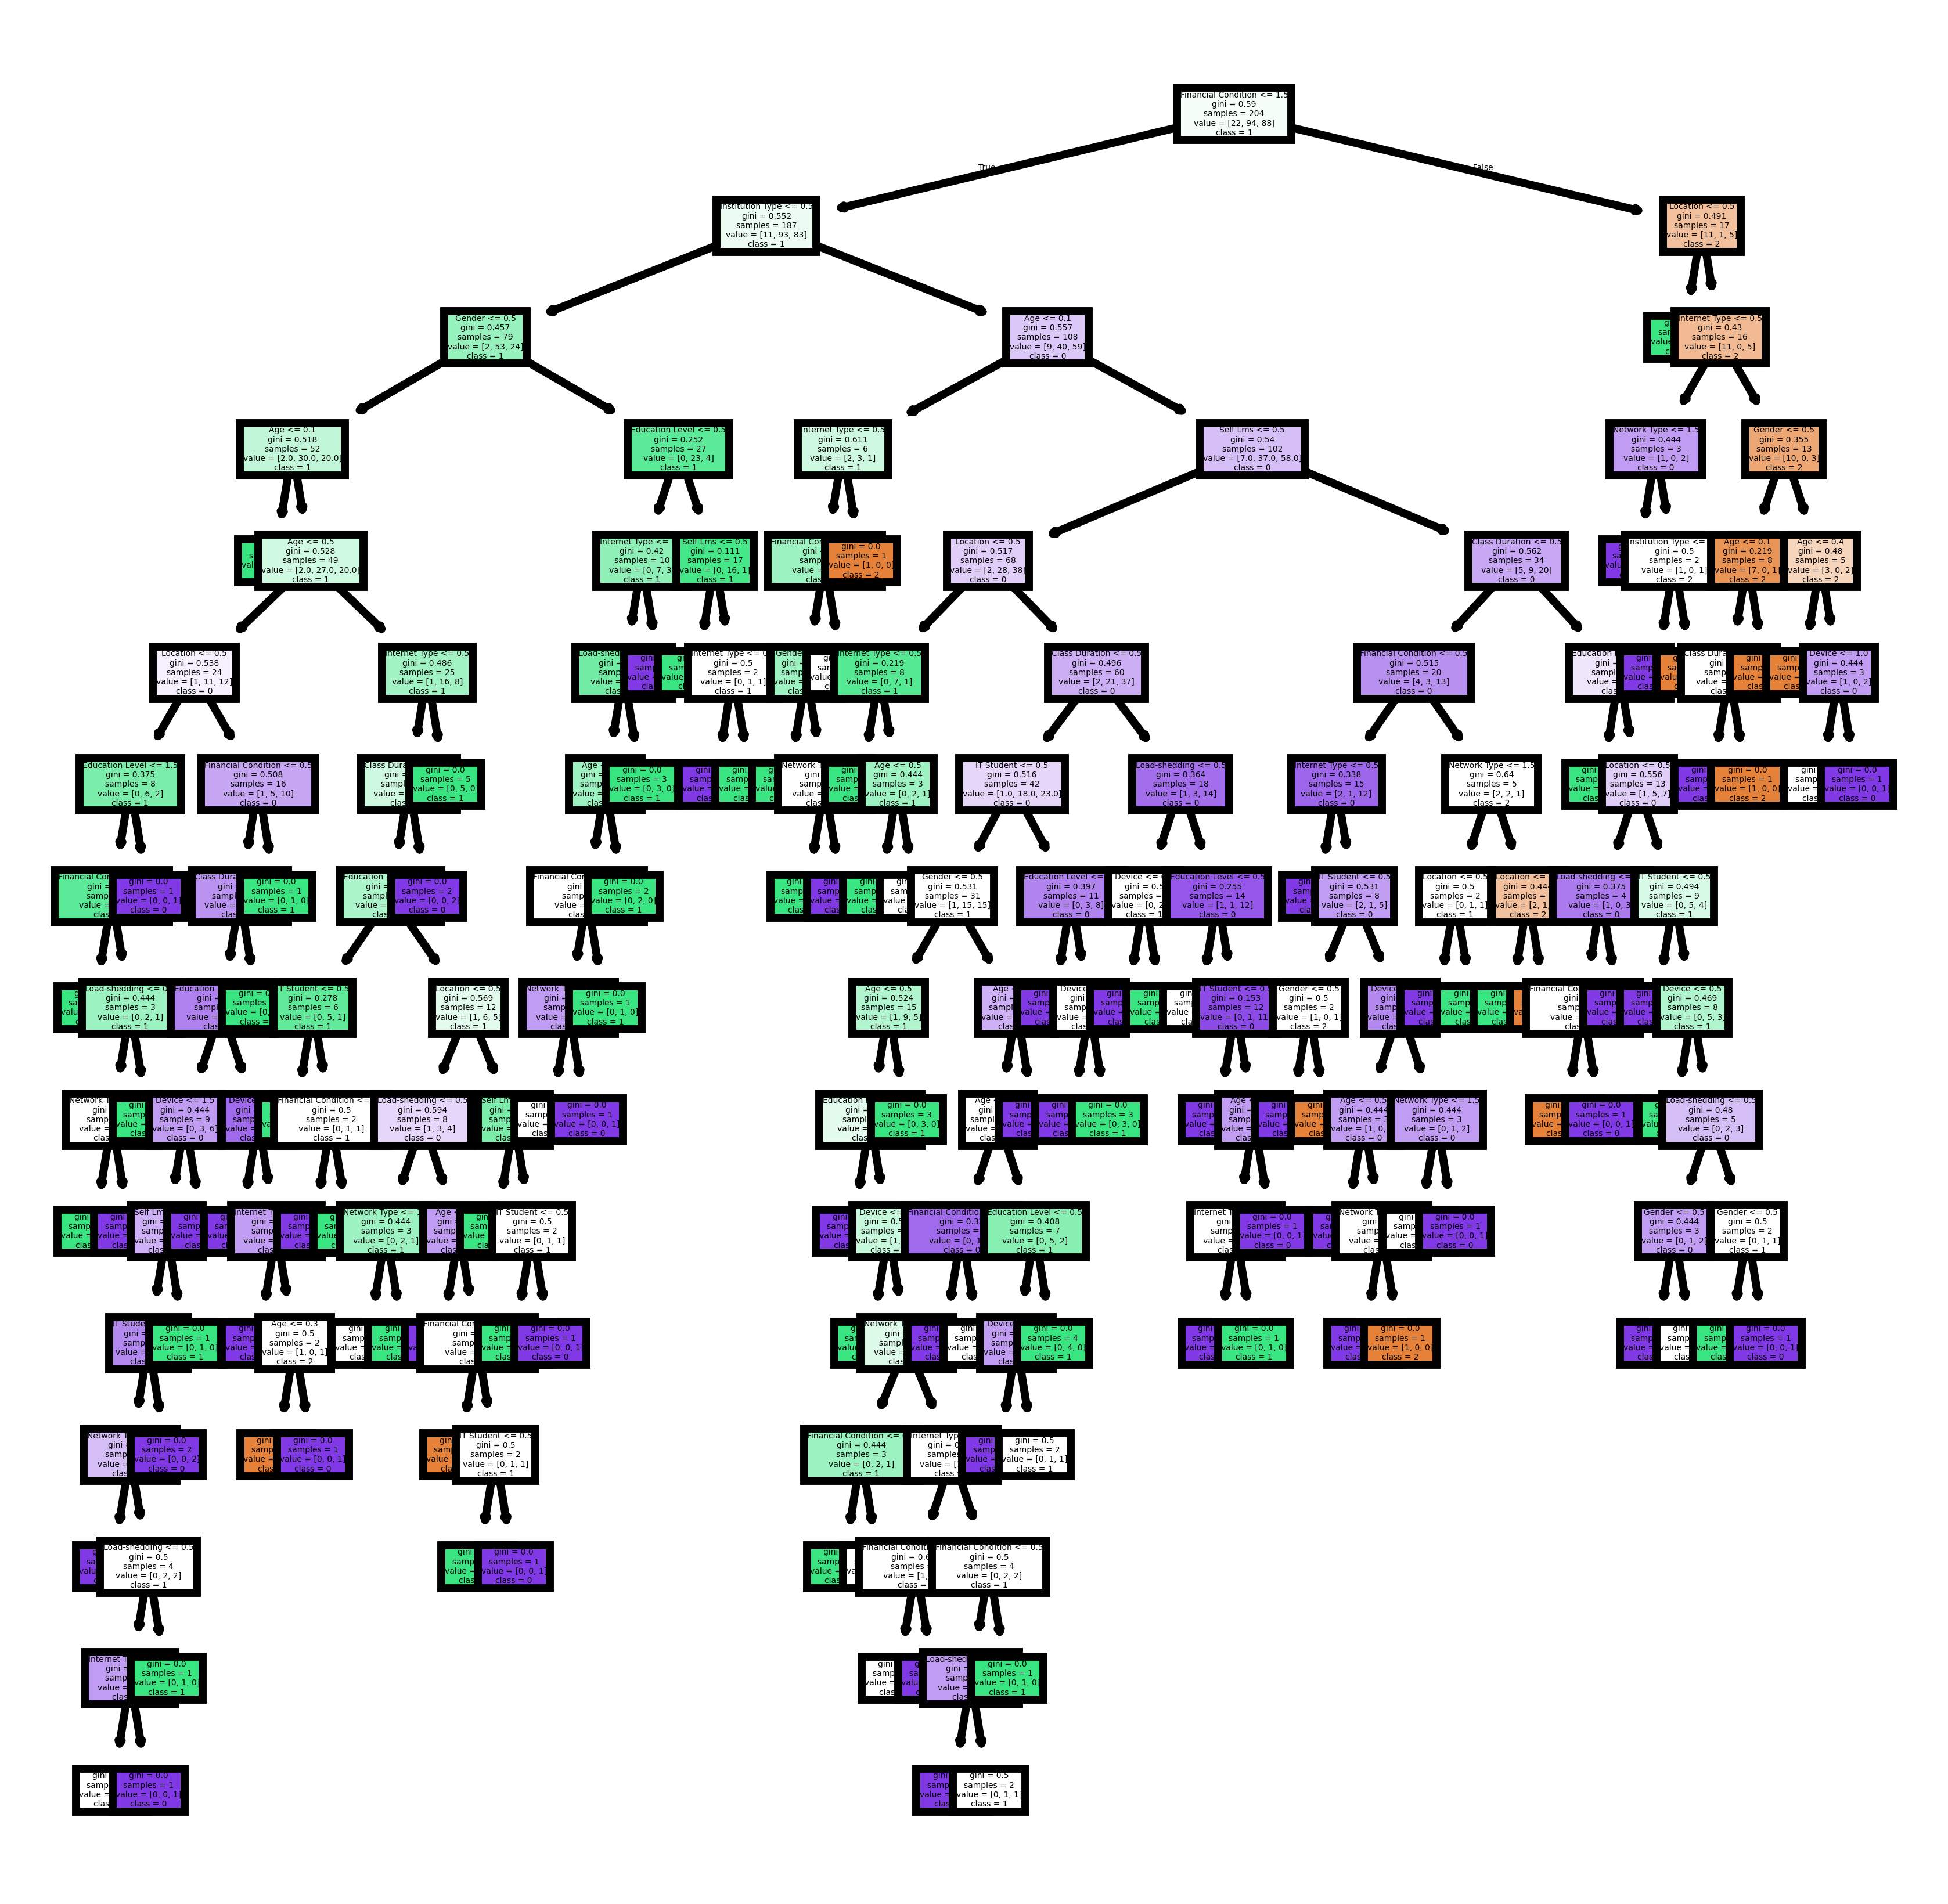

In [16]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

## Entropy

In [17]:
#Build Decision Tree Model (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_entropy = dt_entropy.predict(X_test)

Accuracy: 0.38461538461538464
Confusion Matrix:
[[ 0  0  2]
 [ 2 13  5]
 [ 6 17  7]]


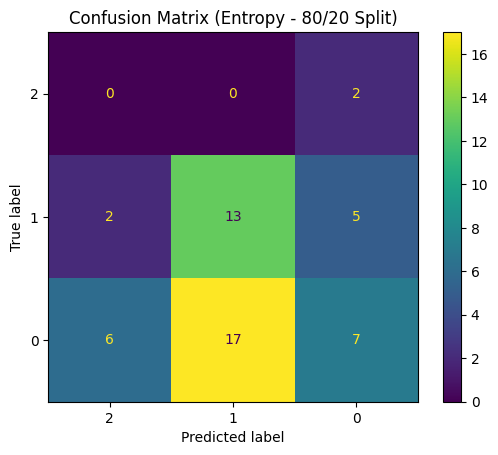

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_entropy,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Entropy - 80/20 Split)")
plt.show()

The model reached an accuracy of 40.4%
Similar to the previous case, it predicts most samples as “Low” (label 1) — 17 from “High” and 13 correctly classified — showing a clear bias toward this class.
The model fails to correctly classify any “Moderate” (label 2) samples and still confuses “High” with “Low”, indicating overlapping feature patterns.


[Text(0.6373559397163121, 0.975, 'Financial Condition <= 1.5\nentropy = 1.385\nsamples = 204\nvalue = [22, 94, 88]\nclass = 1'),
 Text(0.35509013002364065, 0.925, 'Institution Type <= 0.5\nentropy = 1.262\nsamples = 187\nvalue = [11, 93, 83]\nclass = 1'),
 Text(0.4962230348699764, 0.95, 'True  '),
 Text(0.1938534278959811, 0.875, 'Gender <= 0.5\nentropy = 1.043\nsamples = 79\nvalue = [2, 53, 24]\nclass = 1'),
 Text(0.0851063829787234, 0.825, 'Age <= 0.1\nentropy = 1.169\nsamples = 52\nvalue = [2.0, 30.0, 20.0]\nclass = 1'),
 Text(0.07565011820330969, 0.775, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = 1'),
 Text(0.09456264775413711, 0.775, 'Age <= 0.3\nentropy = 1.19\nsamples = 49\nvalue = [2.0, 27.0, 20.0]\nclass = 1'),
 Text(0.037825059101654845, 0.725, 'Network Type <= 1.5\nentropy = 1.5\nsamples = 4\nvalue = [1, 1, 2]\nclass = 0'),
 Text(0.028368794326241134, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1'),
 Text(0.04728132387706856, 0.675, 'Device <= 

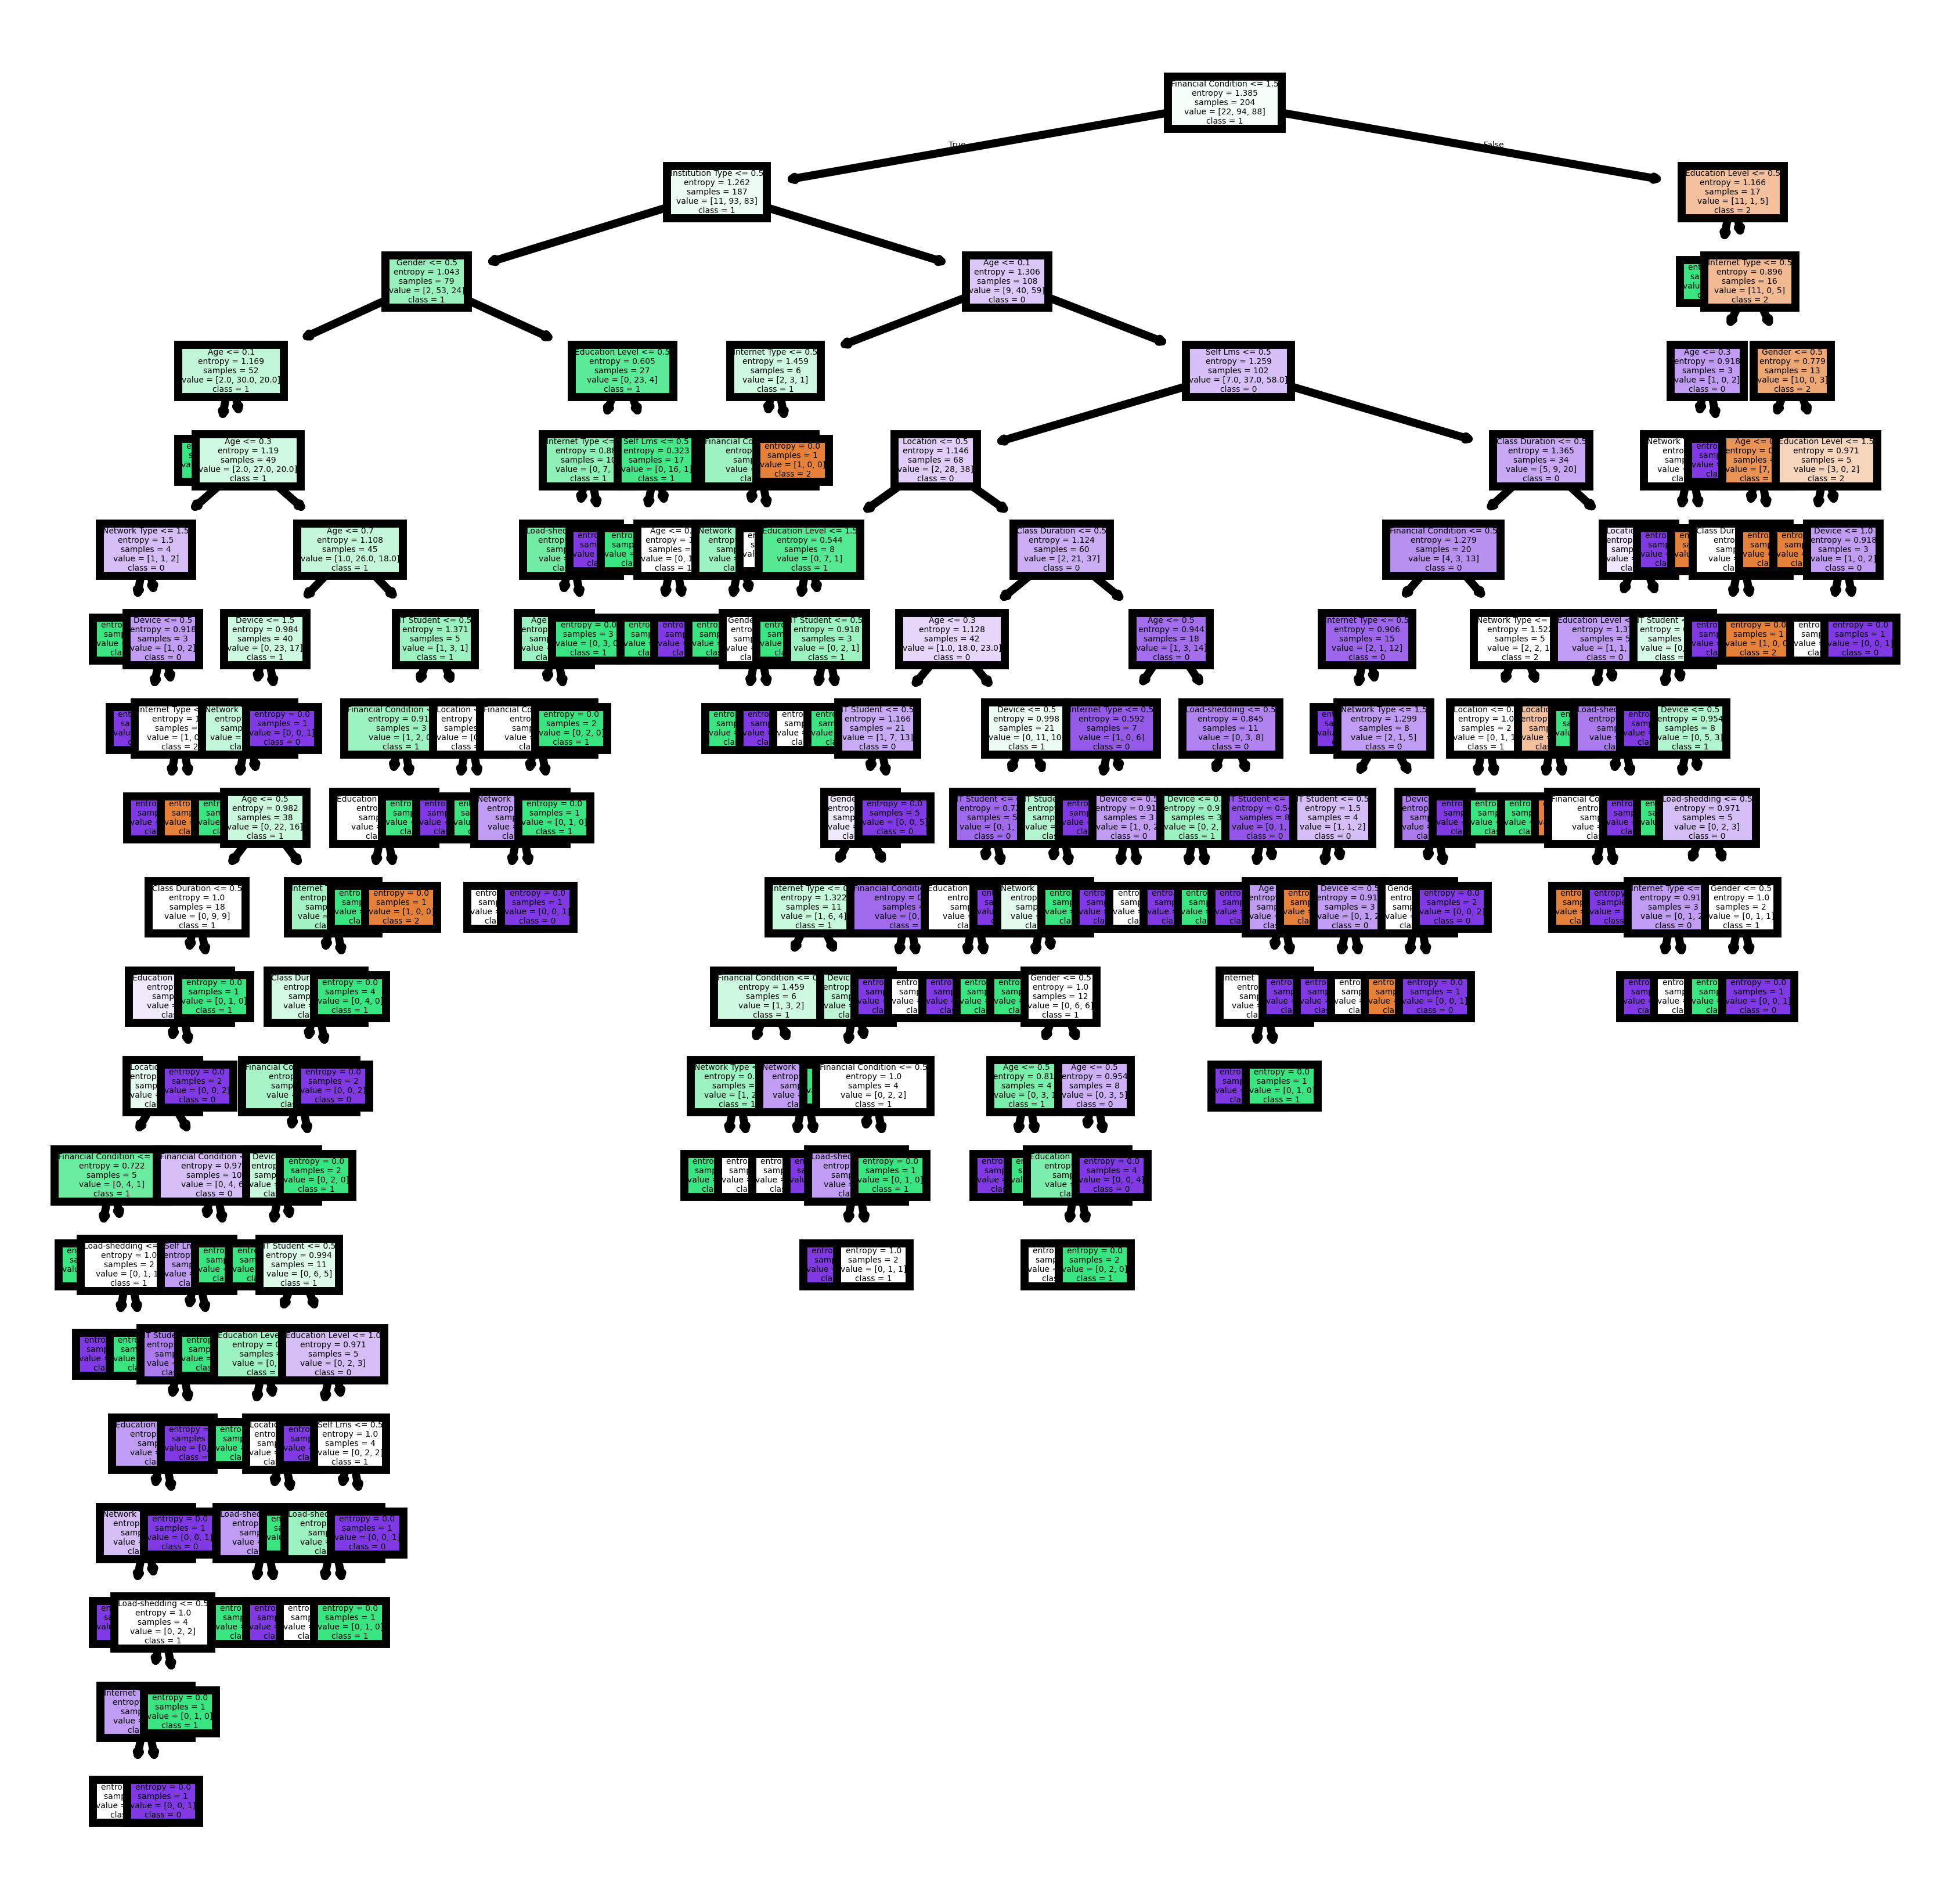

In [19]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_entropy,feature_names=fn,class_names=cn,filled=True)

## Comparsion

Gini Index accuracy= 0.365 (37%) lower accuracy

Information Gain (Entropy) accuracy= 0.403 (40%) higher accuracy

based on the accuracy , using Entropy is better when splitting using 80/20 size

#3-Splitting dataset into 90% Training and 10% Testing

In [20]:
# Split dataset into 90% Training and 10% Testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (230, 13)
Testing set size: (26, 13)


## Gini Index

In [21]:
#Build Decision Tree Model (Gini Index)

# Model using Gini Index
dt_gini = DecisionTreeClassifier()
dt_gini=dt_gini.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_gini = dt_gini.predict(X_test)

Accuracy: 0.34615384615384615
Confusion Matrix:
[[ 0  1  0]
 [ 0  7  2]
 [ 4 10  2]]


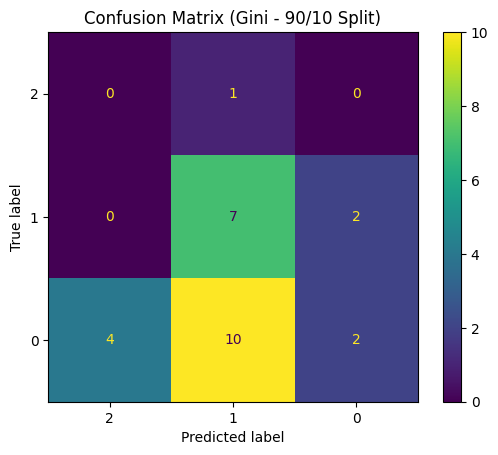

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_gini,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Gini - 90/10 Split)")
plt.show()

The model achieved an accuracy of 30.8%, indicating weak predictive performance.
Most test samples were predicted as “Low” (label 1) — with 11 from “High” and 7 correctly classified — showing a strong bias toward this class.
The “High” (label 0) and “Moderate” (label 2) levels were poorly recognized, with no correct predictions for “Moderate.”

[Text(0.4921916577967004, 0.96875, 'Institution Type <= 0.5\ngini = 0.585\nsamples = 230\nvalue = [23, 105, 102]\nclass = 1'),
 Text(0.2575838211814795, 0.90625, 'Gender <= 0.5\ngini = 0.472\nsamples = 92\nvalue = [4.0, 61.0, 27.0]\nclass = 1'),
 Text(0.37488773948908993, 0.9375, 'True  '),
 Text(0.18307610431080362, 0.84375, 'Age <= 0.7\ngini = 0.54\nsamples = 60\nvalue = [4, 34, 22]\nclass = 1'),
 Text(0.11069717935071846, 0.78125, 'Location <= 0.5\ngini = 0.501\nsamples = 53\nvalue = [1, 31, 21]\nclass = 1'),
 Text(0.05534858967535923, 0.71875, 'Education Level <= 1.5\ngini = 0.397\nsamples = 22\nvalue = [0, 16, 6]\nclass = 1'),
 Text(0.025545502927088876, 0.65625, 'Load-shedding <= 0.5\ngini = 0.142\nsamples = 13\nvalue = [0, 12, 1]\nclass = 1'),
 Text(0.017030335284725917, 0.59375, 'Financial Condition <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = 1'),
 Text(0.008515167642362959, 0.53125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.025545502927

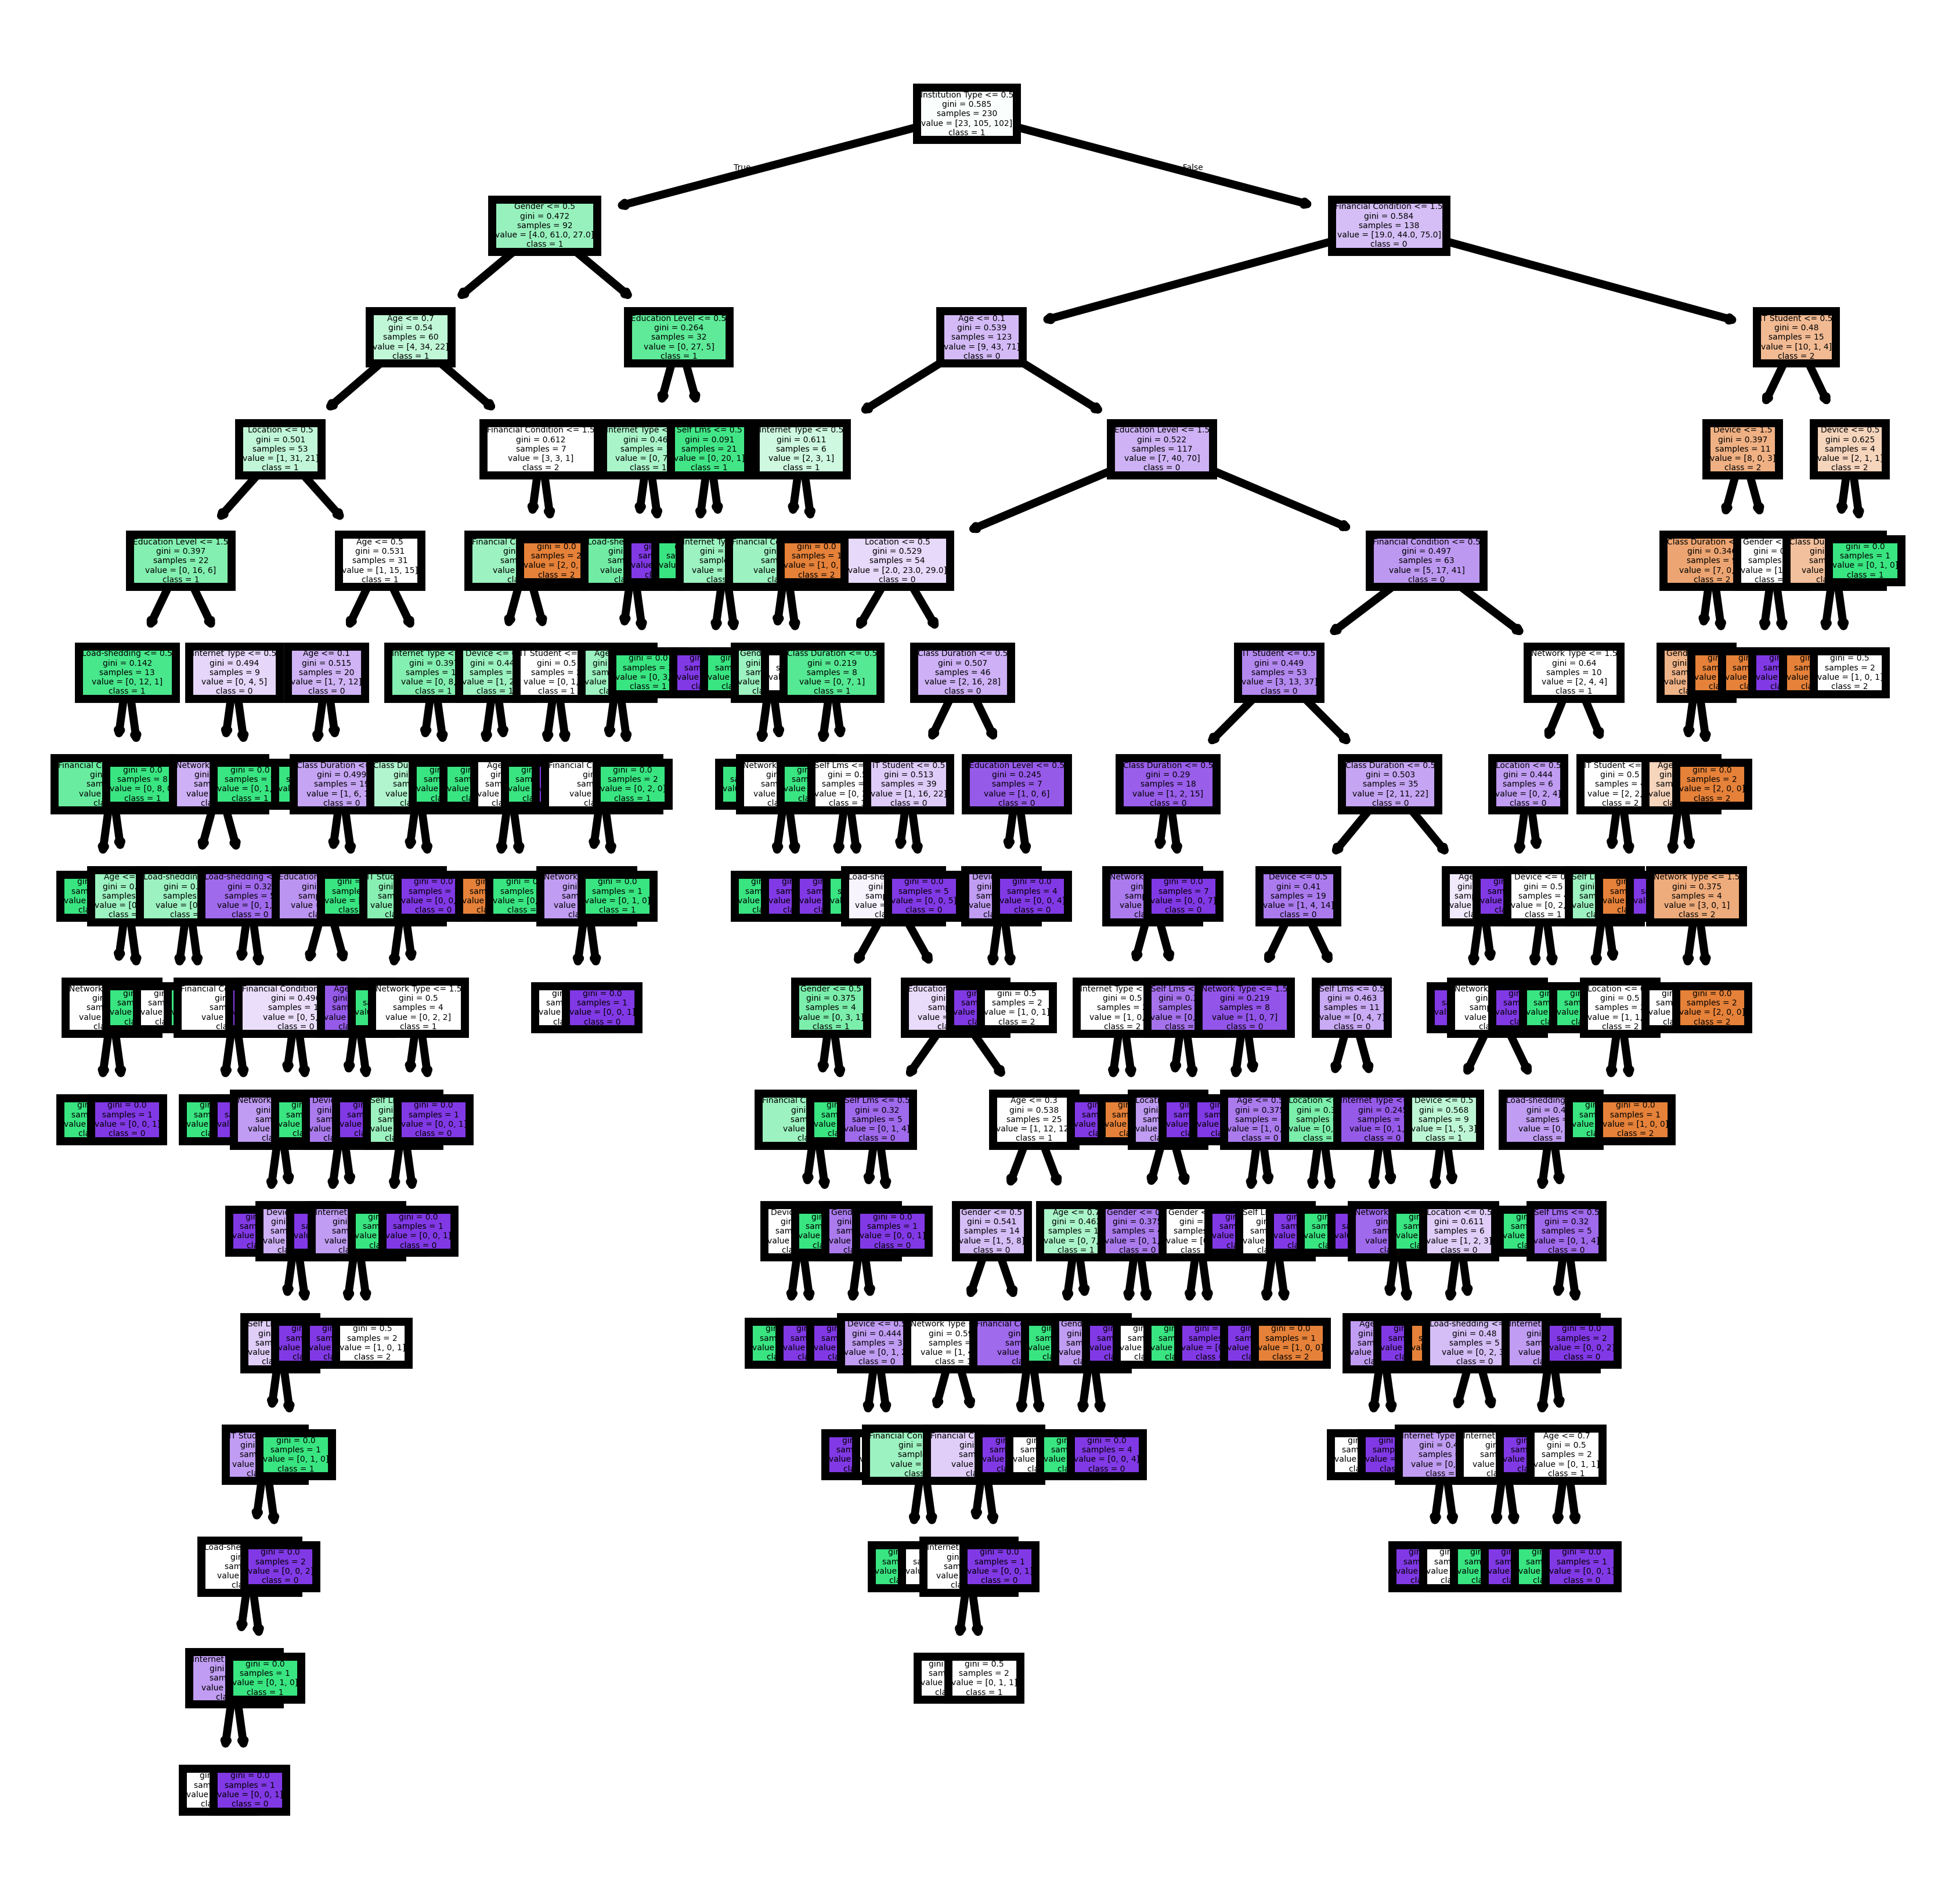

In [23]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

## Entropy

In [24]:
#Build Decision Tree Model (Information Gain)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)
#Predict the respones for test dataset
y_pred_entropy = dt_entropy.predict(X_test)

Accuracy: 0.46153846153846156
Confusion Matrix:
[[0 1 0]
 [0 6 3]
 [2 8 6]]


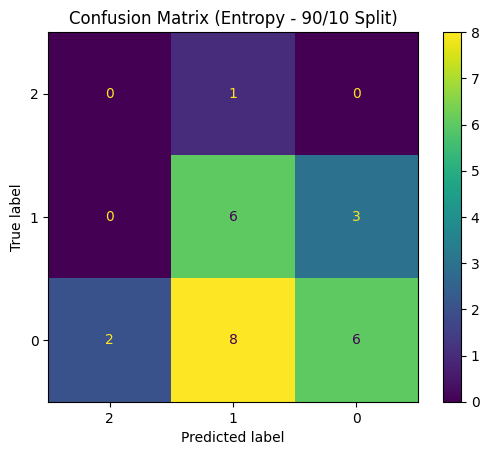

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

#Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

from sklearn.metrics import ConfusionMatrixDisplay
cn = [str(c) for c in df['Adaptivity Level'].unique()]

#create a confusion matrix display object
disp=ConfusionMatrixDisplay.from_estimator(dt_entropy,X_test,y_test,display_labels=cn)
plt.title("Confusion Matrix (Entropy - 90/10 Split)")
plt.show()

The model achieved an accuracy of 50%
It correctly classified several samples of the “Low” (label 1) and “High” (label 0) classes (6 and 7 correct, respectively), showing slightly better balance across categories.
However, the “Moderate” (label 2) class was entirely misclassified, with all samples predicted as other labels.

[Text(0.4921916577967004, 0.96875, 'Institution Type <= 0.5\ngini = 0.585\nsamples = 230\nvalue = [23, 105, 102]\nclass = 1'),
 Text(0.2575838211814795, 0.90625, 'Gender <= 0.5\ngini = 0.472\nsamples = 92\nvalue = [4.0, 61.0, 27.0]\nclass = 1'),
 Text(0.37488773948908993, 0.9375, 'True  '),
 Text(0.18307610431080362, 0.84375, 'Age <= 0.7\ngini = 0.54\nsamples = 60\nvalue = [4, 34, 22]\nclass = 1'),
 Text(0.11069717935071846, 0.78125, 'Location <= 0.5\ngini = 0.501\nsamples = 53\nvalue = [1, 31, 21]\nclass = 1'),
 Text(0.05534858967535923, 0.71875, 'Education Level <= 1.5\ngini = 0.397\nsamples = 22\nvalue = [0, 16, 6]\nclass = 1'),
 Text(0.025545502927088876, 0.65625, 'Load-shedding <= 0.5\ngini = 0.142\nsamples = 13\nvalue = [0, 12, 1]\nclass = 1'),
 Text(0.017030335284725917, 0.59375, 'Financial Condition <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = 1'),
 Text(0.008515167642362959, 0.53125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.025545502927

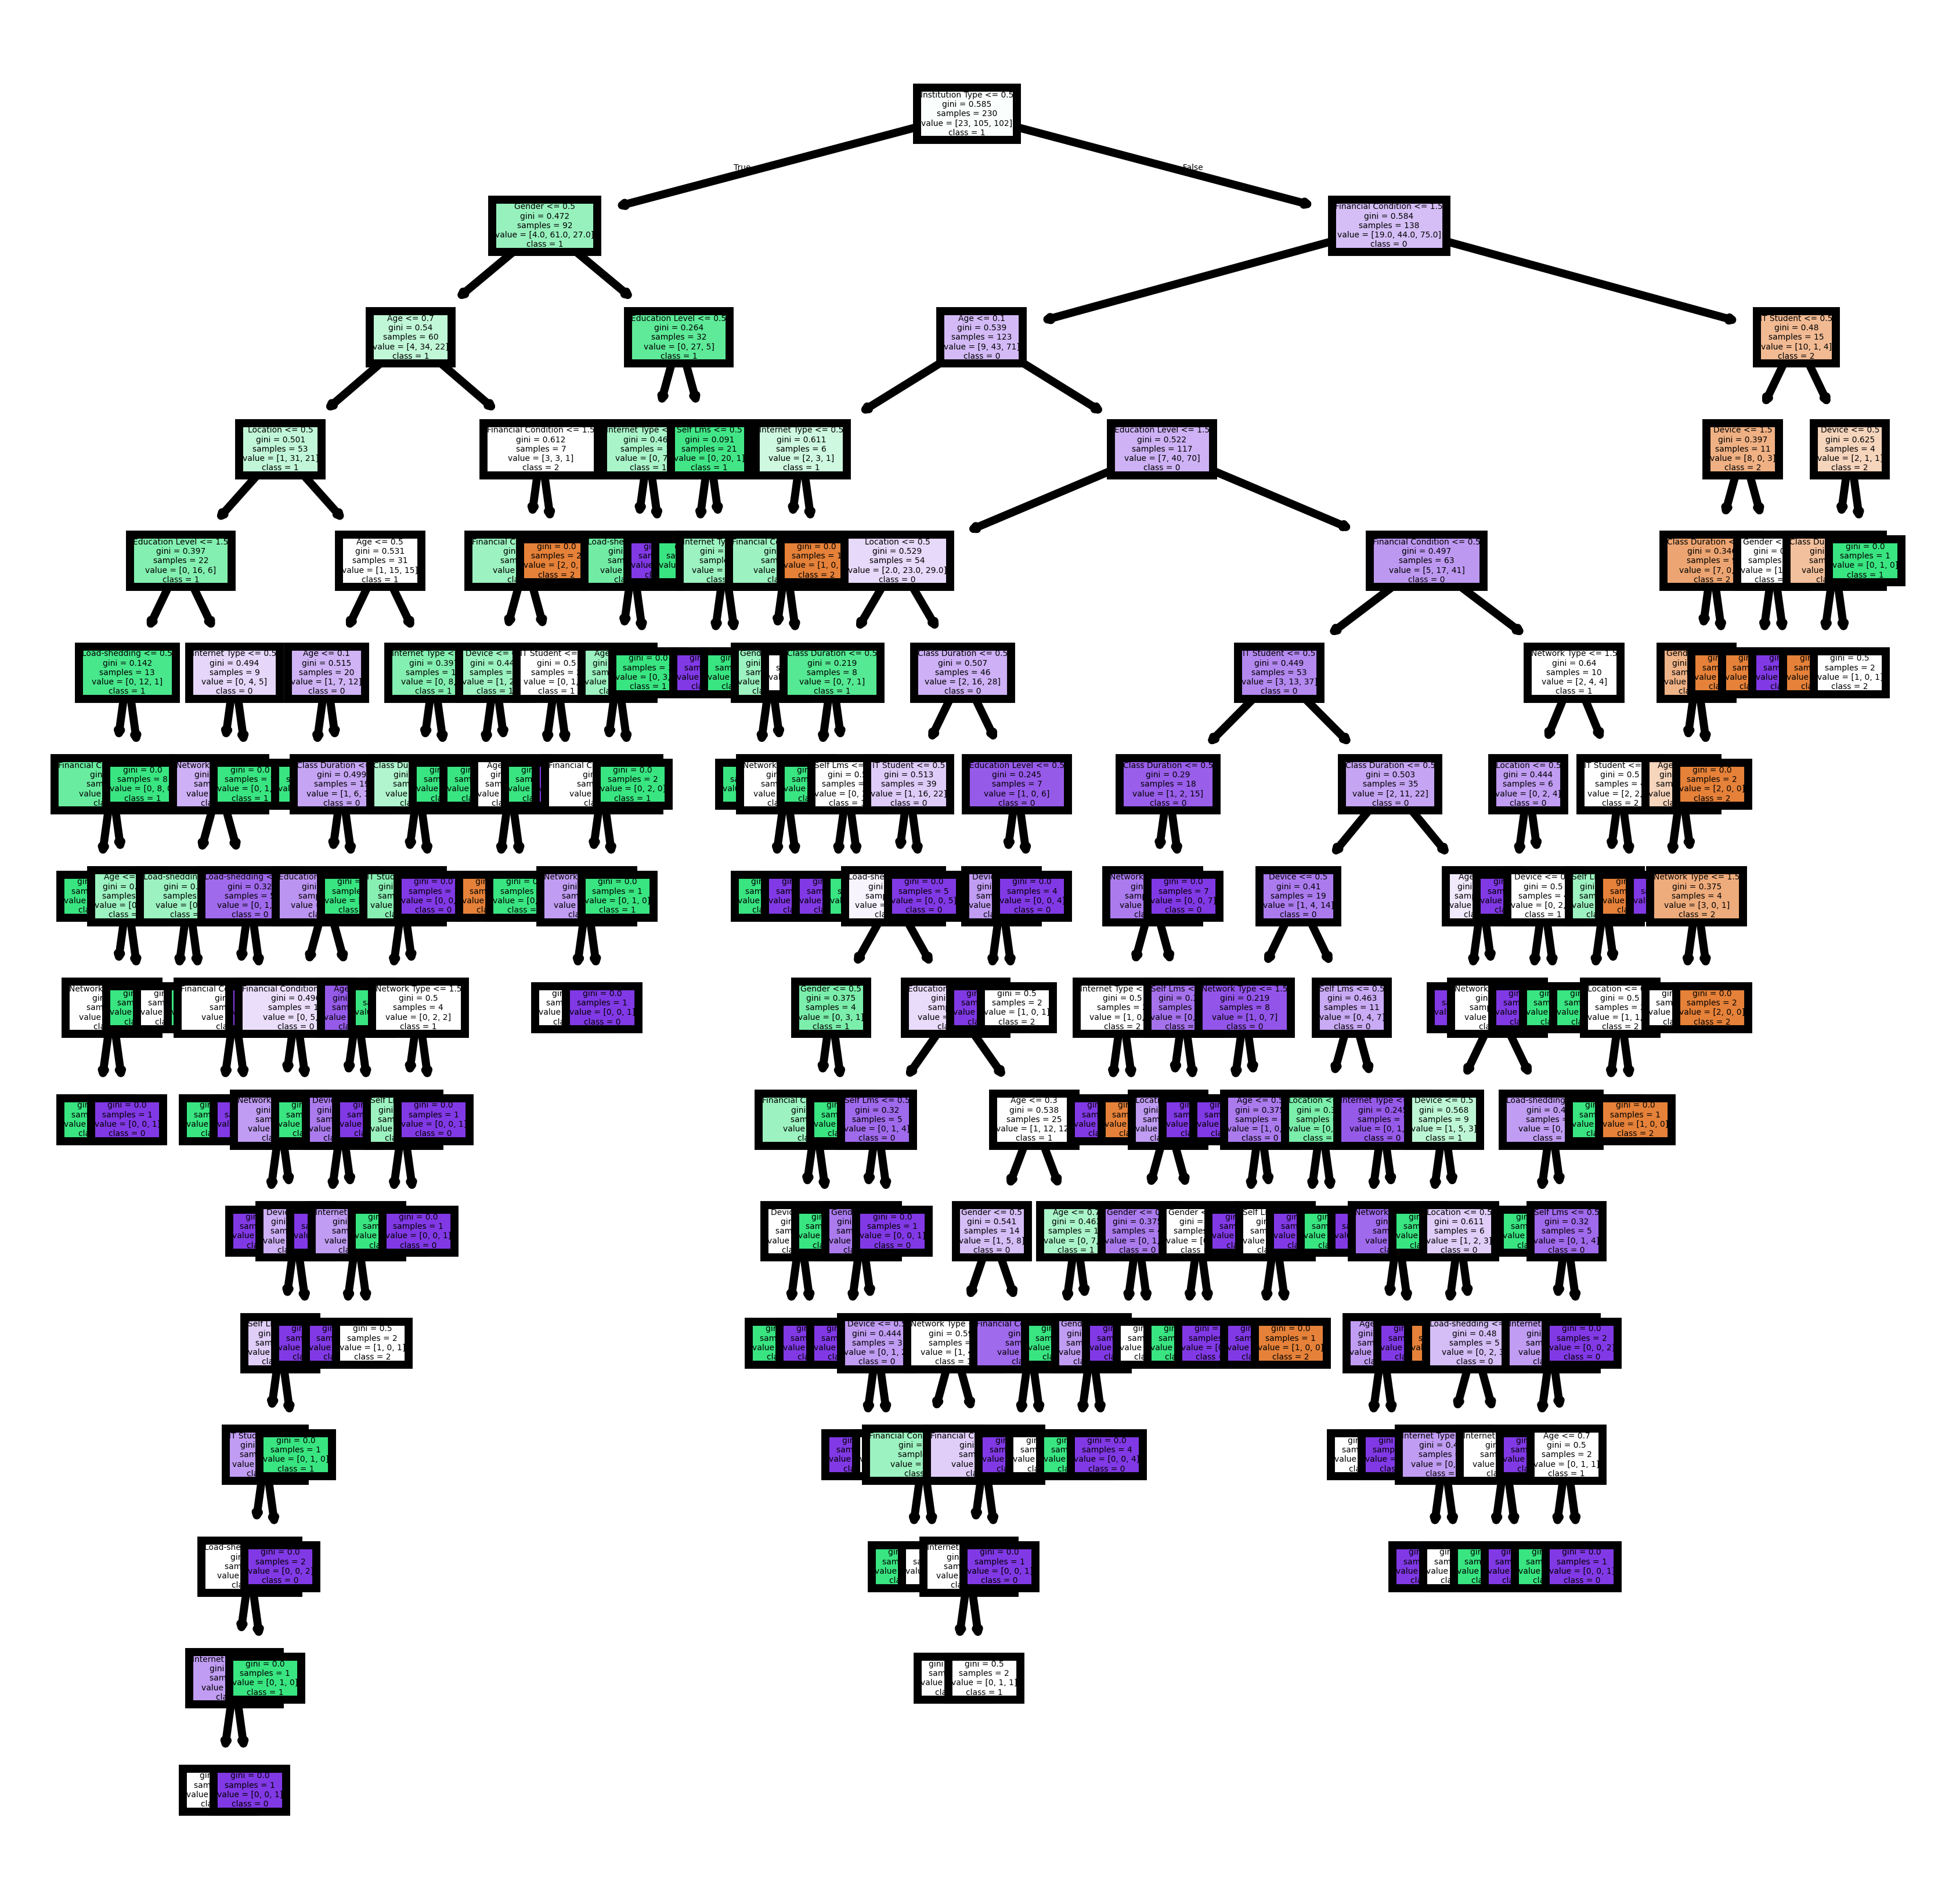

In [26]:
#Visualizing and Saving Decision Tree
from sklearn import tree
#Setting dpi=1000 to make the image clearer
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=1000)
tree.plot_tree(dt_gini,feature_names=fn,class_names=cn,filled=True)

## Comparsion

Gini Index accuracy= 0.307 (31%) lower accuracy

Information Gain (Entropy) accuracy= 0.4 (50%) higher accuracy

based on the accuracy , using Entropy is better when splitting using 90/10 size

In [37]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2


df = pd.read_csv('Cleaned_dataset.csv')

# Choose any two categorical attributes
attr1 = 'Network Type'
attr2 = 'Internet Type'

# Create the contingency table
table = pd.crosstab(df[attr1], df[attr2])
print("Contingency Table:\n", table, "\n")

# Perform Chi-Square Test
chi2_stat, p, dof, expected = chi2_contingency(table)

# Set alpha and find critical value (same as your slide)
alpha = 0.001
critical_value = chi2.ppf(1 - alpha, dof)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat:.3f}")
print(f"Degrees of Freedom: {dof}")
print(f"Critical Value (α={alpha}): {critical_value:.3f}")
print(f"p-value: {p:.5f}")

# Decision (same logic as slide)
if chi2_stat > critical_value:
    print("Reject H₀ → Attributes are NOT independent → Correlated")
else:
    print(" Fail to reject H₀ → Attributes are independent → NOT correlated")


Contingency Table:
 Internet Type   0   1
Network Type         
0               5   2
1              65  23
2              68  93 

Chi-Square Statistic: 23.796
Degrees of Freedom: 2
Critical Value (α=0.001): 13.816
p-value: 0.00001
Reject H₀ → Attributes are NOT independent → Correlated
